In [6]:
import irbasis
import numpy

b = irbasis.load('F',  1000)
print("dim: ", b.dim())

# All singular values
print("singular values: ", b.sl())
print("u_0(0.1)", b.ulx(0, 0.1))
print("v_0(0.1)", b.vly(0, 0.1))

print("k-th derivative of u_l(x) and v_l(y)")
for k in range(1,3):
    print(" ", k, b.d_ulx(0, 0.1, k))
    print(" ", k, b.d_vly(0, 0.1, k))

# Compute u_{ln} as a matrix for the first
# 10 non-nagative Matsubara frequencies
unl = b.compute_unl(numpy.arange(10))
print("unl ", unl.shape)

dim:  72
singular values:  [6.93676632e-02 6.39029304e-02 4.73525981e-02 3.78765556e-02
 2.69709397e-02 1.97919952e-02 1.38987851e-02 9.79170114e-03
 6.77586537e-03 4.66563008e-03 3.18095991e-03 2.15479043e-03
 1.44908097e-03 9.68433898e-04 6.43222579e-04 4.24765651e-04
 2.78944576e-04 1.82210441e-04 1.18411677e-04 7.65700139e-05
 4.92756267e-05 3.15628325e-05 2.01254341e-05 1.27758728e-05
 8.07529293e-06 5.08266091e-06 3.18587477e-06 1.98887606e-06
 1.23669448e-06 7.65992957e-07 4.72633737e-07 2.90529576e-07
 1.77929561e-07 1.08573268e-07 6.60143404e-08 3.99959952e-08
 2.41478607e-08 1.45293028e-08 8.71232105e-09 5.20671801e-09
 3.10136291e-09 1.84126342e-09 1.08960675e-09 6.42730925e-10
 3.77927545e-10 2.21524423e-10 1.29443906e-10 7.54051848e-11
 4.37917794e-11 2.53552246e-11 1.46364946e-11 8.42388202e-12
 4.83396492e-12 2.76580014e-12 1.57787966e-12 8.97577822e-13
 5.09125136e-13 2.87965124e-13 1.62415181e-13 9.13467044e-14
 5.12326226e-14 2.86546680e-14 1.59825721e-14 8.89012035e-

In [7]:
import irbasis
import numpy

beta = 100.0
wmax = 10
b = irbasis.load('F', wmax * beta)
dim = b.dim()

# Sampling points in x
sp_x = b.sampling_points_x(whichl=dim-1)
print(sp_x)

# Sampling frequencies in n
sp_n = b.sampling_points_matsubara(whichl=dim-1)
print(sp_n)

all_ls = numpy.arange(dim)

# Compute F and pseudo inverse for imaginary time
Ftau = numpy.sqrt(2/beta) * \
    b.ulx(all_ls[:, None], sp_x[None,:])
invFtau = numpy.linalg.pinv(Ftau)

# Compute F and pseudo inverse for imaginary frequency
hatF = numpy.sqrt(beta) * b.compute_unl(sp_n)
invhatF = numpy.linalg.pinv(hatF)

[-0.99993502 -0.99959192 -0.99881051 -0.99757353 -0.99586811 -0.99367623
 -0.99097405 -0.98773113 -0.98390935 -0.97946168 -0.97433066 -0.96844652
 -0.96172502 -0.95406504 -0.94534584 -0.93542411 -0.92413097 -0.91126882
 -0.89660834 -0.87988568 -0.86079999 -0.83901167 -0.81414173 -0.78577301
 -0.75345446 -0.71671003 -0.67505415 -0.62801642 -0.57517774 -0.51621973
 -0.45098698 -0.37955772 -0.30231318 -0.21998938 -0.13369172 -0.04485519
  0.04485519  0.13369172  0.21998938  0.30231318  0.37955772  0.45098698
  0.51621973  0.57517774  0.62801642  0.67505415  0.71671003  0.75345446
  0.78577301  0.81414173  0.83901167  0.86079999  0.87988568  0.89660834
  0.91126882  0.92413097  0.93542411  0.94534584  0.95406504  0.96172502
  0.96844652  0.97433066  0.97946168  0.98390935  0.98773113  0.99097405
  0.99367623  0.99586811  0.99757353  0.99881051  0.99959192  0.99993502]
[-1739  -716  -435  -307  -234  -186  -151  -126  -106   -90   -77   -66
   -57   -49   -43   -37   -32   -28   -24   -21  

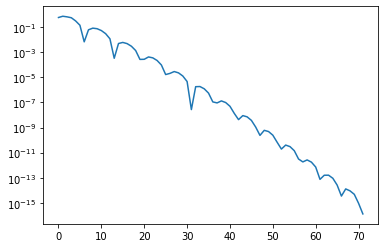

In [8]:
import matplotlib.pyplot as plt

# Green's function evaluated on the sampling frequencies
giw = 1/(1J*(2*sp_n+1)/beta - 1.0)
gl_from_iw = invhatF @ giw

plt.semilogy(numpy.abs(gl_from_iw.real))